# SMS Spam Detection - Data Processing

This notebook covers the data exploration, cleaning, and preprocessing steps for the SMS Spam Detection project.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 1. Data Loading and Initial Exploration

In [25]:
# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Drop unnecessary columns and rename the remaining ones
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

# Display basic information about the dataset
print(df.info())
print("\nSample data:")
display(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

print("\nColumn names:")
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Sample data:


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



Missing values:
label    0
text     0
dtype: int64

Column names:
Index(['label', 'text'], dtype='object')


## 2. Data Visualization


Class distribution:
label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64


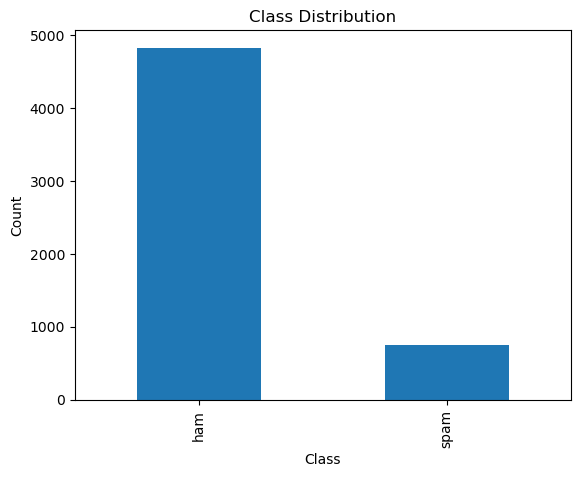

In [26]:
# Display class distribution
print("\nClass distribution:")
print(df['label'].value_counts(normalize=True))

# Visualize class distribution using Pandas plotting
df['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## 3. Feature Engineering

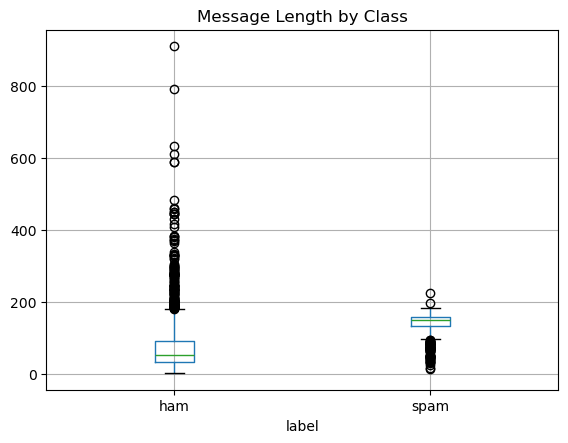

In [27]:
# Add a new feature: message length
df['message_length'] = df['text'].apply(len)

# Visualize message length distribution using Pandas plotting
df.boxplot(column='message_length', by='label')
plt.title('Message Length by Class')
plt.suptitle('')  # This removes the automatic suptitle added by Pandas
plt.show()

## 4. Time Series Analysis

C:\Users\natha\AppData\Local\Temp\ipykernel_11664\2758002484.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['timestamp'] = pd.date_range(start='2023-01-01', periods=len(df), freq='H')


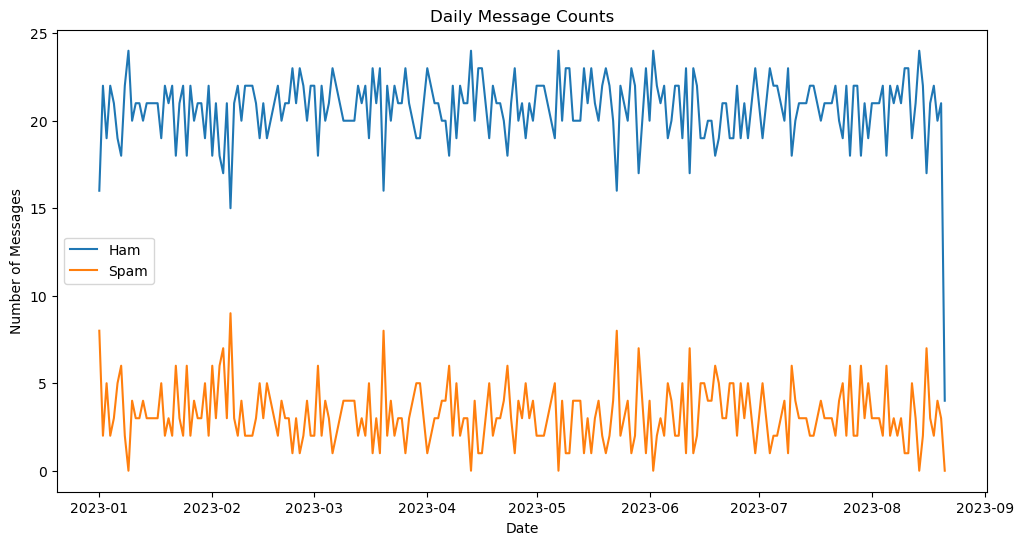

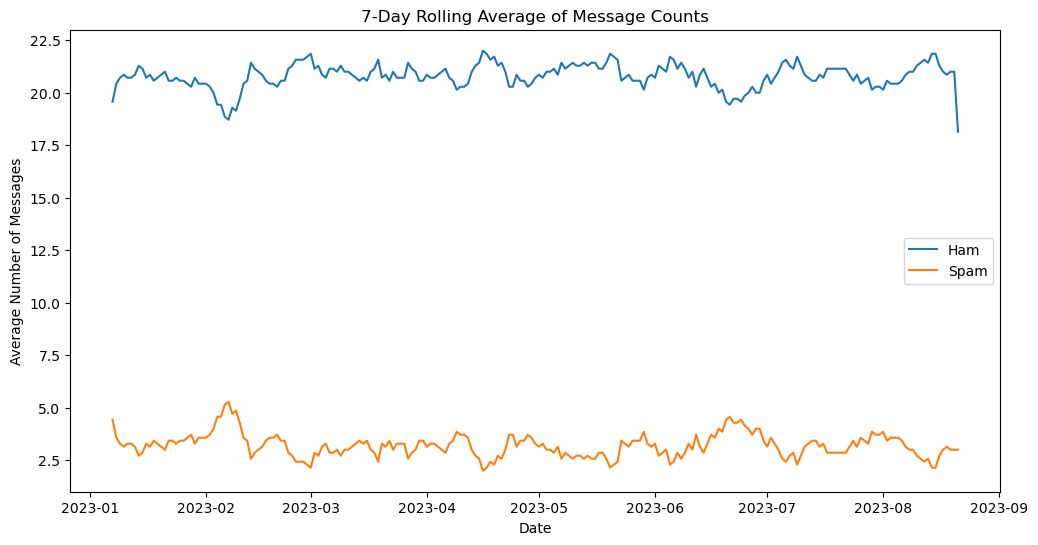

In [28]:
# Add a timestamp to our data (assume messages are received in order)
df['timestamp'] = pd.date_range(start='2023-01-01', periods=len(df), freq='H')

# Group by date and class, count messages
daily_counts = df.groupby([df['timestamp'].dt.date, 'label']).size().unstack(fill_value=0)

# Plot time series of message counts
daily_counts.plot(figsize=(12, 6))
plt.title('Daily Message Counts')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.legend(['Ham', 'Spam'])
plt.show()

# Calculate and plot rolling average
rolling_avg = daily_counts.rolling(window=7).mean()
rolling_avg.plot(figsize=(12, 6))
plt.title('7-Day Rolling Average of Message Counts')
plt.xlabel('Date')
plt.ylabel('Average Number of Messages')
plt.legend(['Ham', 'Spam'])
plt.show()

## 5. Data Cleaning and Preprocessing

In [29]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the text column
df['cleaned_text'] = df['text'].apply(preprocess_text)

print("Sample cleaned data:")
display(df[['text', 'cleaned_text']].head())

Sample cleaned data:


,text,cleaned_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


## 6. Export Cleaned Data

In [30]:
# Export cleaned data as CSV
df.to_csv('cleaned_sms_data.csv', index=False)

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.25, random_state=42)

# Export train and test sets
pd.DataFrame({'text': X_train, 'label': y_train}).to_csv('train_data.csv', index=False)
pd.DataFrame({'text': X_test, 'label': y_test}).to_csv('test_data.csv', index=False)

print("Data exported successfully!")
print(f"Training set size: {len(X_train)} ({len(X_train) / len(df['cleaned_text']):.2%})")
print(f"Test set size: {len(X_test)} ({len(X_test) / len(df['cleaned_text']):.2%})")

Data exported successfully!
Training set size: 4179 (75.00%)
Test set size: 1393 (25.00%)
